<a href="https://colab.research.google.com/github/AhmadJalal789/Projects/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import io, transform
from tensorflow.keras.layers import Flatten
import seaborn as sns
import matplotlib.pyplot as plt

#from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications import VGG16

import tensorflow as tf
import tensorflow_hub as hub
import cv2

import PIL.Image as Image
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [2]:
# installing to unzip the rar file
!apt-get install unrar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [3]:
# unzipping the rar file
!unrar x /content/Modelling.rar



UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/Modelling.rar

Creating    Anger                                                     OK
Extracting  Anger/photo 114.jpg                                            1%  OK 
Extracting  Anger/photo 115.jpg                                            2%  OK 
Extracting  Anger/photo 116.jpg                                            3%  OK 
Extracting  Anger/photo100.JPG                                             3%  OK 
Extracting  Anger/photo20.JPG                                              3%  OK 
Extracting  Anger/photo35.JPG                                              4%  OK 
Extracting  Anger/photo37.JPG                                              4%  OK 
Extracting  Anger/photo39.JPG                                              5%  OK 
Extracting  Anger/photo40.JPG                                            

In [4]:
# reading the image folders path in
anger_path = "/content/Anger"
fear_path = "/content/Fear"
neutral_path = "/content/Neutral"
stress_path = "/content/Stress"

In [5]:
# defing a function to read the images

def load_images(anger_path, fear_path,neutral_path,stress_path):
    data = []
    labels = []

    for file in os.listdir(anger_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(anger_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)
            # giving zero label to anger images
            labels.append(0)

    for file in os.listdir(fear_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(fear_path, file), as_gray=True)
            img = transform.resize(img, (224,224,3))
            data.append(img)

            # giving one label to fear images
            labels.append(1)
    
    
    for file in os.listdir(neutral_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(neutral_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)

            # giving 2 label to neutral images
            labels.append(2)

    for file in os.listdir(stress_path):
        if file.endswith(".JPG"):
            img = io.imread(os.path.join(stress_path, file), as_gray=True)
            img = transform.resize(img, (224, 224,3))
            data.append(img)

            # giving 3 label to stress images
            labels.append(3)
    

    data = np.array(data)
    data = data.reshape((data.shape[0], 224, 224,3))
    labels = np.array(labels)

    return data, labels

In [6]:
# reading the images from the folders
data, labels = load_images(anger_path, fear_path, neutral_path,stress_path)


In [7]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
data.shape

(134, 224, 224, 3)

In [9]:
X_train.shape

(107, 224, 224, 3)

In [10]:
X_test.shape

(27, 224, 224, 3)

In [11]:
y_train.shape

(107,)

In [12]:
X_train

array([[[[0.81360294, 0.81360294, 0.81360294],
         [0.81360294, 0.81360294, 0.81360294],
         [0.81360294, 0.81360294, 0.81360294],
         ...,
         [0.80876223, 0.80876223, 0.80876223],
         [0.80876223, 0.80876223, 0.80876223],
         [0.80876223, 0.80876223, 0.80876223]],

        [[0.67291667, 0.67291667, 0.67291667],
         [0.67291667, 0.67291667, 0.67291667],
         [0.67291667, 0.67291667, 0.67291667],
         ...,
         [0.66664038, 0.66664038, 0.66664038],
         [0.66664038, 0.66664038, 0.66664038],
         [0.66664038, 0.66664038, 0.66664038]],

        [[0.43483894, 0.43483894, 0.43483894],
         [0.43483894, 0.43483894, 0.43483894],
         [0.43483894, 0.43483894, 0.43483894],
         ...,
         [0.42433715, 0.42433715, 0.42433715],
         [0.42476963, 0.42476963, 0.42476963],
         [0.42482051, 0.42482051, 0.42482051]],

        ...,

        [[0.41164245, 0.41164245, 0.41164245],
         [0.41149502, 0.41149502, 0.41149502]

In [13]:
y_train[:5]

array([0, 2, 2, 3, 3])

In [14]:
X_train[100].shape

(224, 224, 3)

# Pre-trained model work

In [15]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using the pre-trained model
X_train_features = base_model.predict(np.array(X_train.tolist()))
X_test_features = base_model.predict(np.array(X_test.tolist()))

# Flatten the extracted features
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flattened = X_test_features.reshape(X_test_features.shape[0], -1)

# model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train_flattened.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flattened, y_train, epochs=100, batch_size=32, validation_split=0.2)


58889256/58889256 [==============================] - 0s 0us/step


KeyboardInterrupt: ignored

# ANN model

In [ ]:
# Load the pre-trained VGG16 model
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(107, 128, 128, 1))

# Extract features using the pre-trained model
#X_train_features = base_model.predict(np.array(X_train.tolist()))
#X_test_features = base_model.predict(np.array(X_test.tolist()))

# Flatten the extracted features
#X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)
#X_test_flattened = X_test_features.reshape(X_test_features.shape[0], -1)

# Define the classifier model
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
# plotting training and validation set loss
plt.plot(history.history['loss'],label="training")
plt.plot(history.history['val_loss'],label="validation")
plt.legend()

In [ ]:
# plotting training and validation set accuracy
plt.plot(history.history['accuracy'],label="training")
plt.plot(history.history['val_accuracy'],label="validation")
plt.legend()

# CNN

## Without Data Augmentaition

We are going to use a pretrained model from tensor hub known as mobilenet base model which had been trained on millions of images

In [16]:
#adding pretrained model
model_from_tensorhub = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [17]:
Number_of_emotions=4    #number of emotions happy, anger etc

In [18]:
pretrained_base = hub.KerasLayer(
    model_from_tensorhub, input_shape=(224, 224, 3), trainable=False)   #here is the pretrained base

In [19]:
model = tf.keras.Sequential([
  pretrained_base,
  tf.keras.layers.Dense(Number_of_emotions)
])

# here is the pretrained model with dense layer attached

In [20]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    #sparse categorical crosentropy is used because we have to classy more than 2 classes i.e 4
  metrics=['acc'])

model.fit(X_train, y_train, epochs=15)


#here we have compiled the model

Epoch 1/15
4/4 [==============================] - 5s 198ms/step - loss: 1.3236 - acc: 0.4393
Epoch 2/15
4/4 [==============================] - 0s 32ms/step - loss: 1.1574 - acc: 0.5701
Epoch 3/15
4/4 [==============================] - 0s 34ms/step - loss: 1.0057 - acc: 0.5981
Epoch 4/15
4/4 [==============================] - 0s 34ms/step - loss: 0.9157 - acc: 0.6542
Epoch 5/15
4/4 [==============================] - 0s 34ms/step - loss: 0.8376 - acc: 0.6822
Epoch 6/15
4/4 [==============================] - 0s 34ms/step - loss: 0.7670 - acc: 0.7009
Epoch 7/15
4/4 [==============================] - 0s 33ms/step - loss: 0.7214 - acc: 0.7009
Epoch 8/15
4/4 [==============================] - 0s 33ms/step - loss: 0.6715 - acc: 0.7196
Epoch 9/15
4/4 [==============================] - 0s 32ms/step - loss: 0.6309 - acc: 0.7290
Epoch 10/15
4/4 [==============================] - 0s 33ms/step - loss: 0.6000 - acc: 0.7290
Epoch 11/15
4/4 [==============================] - 0s 35ms/step - loss: 0.5738

In [21]:


model.evaluate(X_test,y_test)

# calculating test score without data augmentation

1/1 [==============================] - 1s 1s/step - loss: 1.2451 - acc: 0.5556


[1.2451037168502808, 0.5555555820465088]

## With Data Augmentation

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])


In [25]:
image1=data_augmentation(X_train)

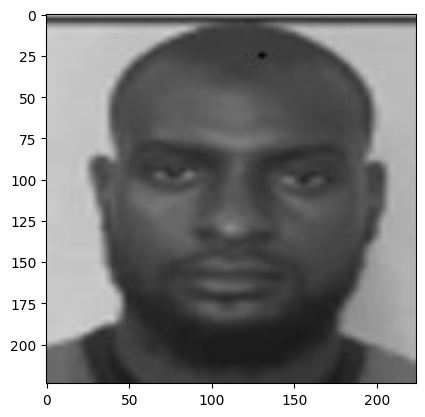

In [23]:
plt.imshow(X_train[0])  #here you can see the original image without any data augmentation

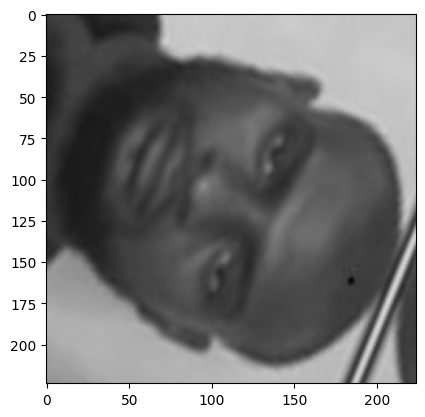

In [26]:
plt.imshow(image1[0])  #here is the rotated version of above image after applying data augmentation

In [27]:
model1 = keras.Sequential([
    data_augmentation,   # addition of augmented layer
    # Base
    pretrained_base,
    # Head
    layers.Dense(Number_of_emotions)
])

In [28]:
model1.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 11s 52ms/step - loss: 1.5725 - acc: 0.3364
Epoch 2/100
4/4 [==============================] - 0s 55ms/step - loss: 1.4347 - acc: 0.5514
Epoch 3/100
4/4 [==============================] - 0s 56ms/step - loss: 1.2298 - acc: 0.5701
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 1.1686 - acc: 0.5327
Epoch 5/100
4/4 [==============================] - 0s 37ms/step - loss: 1.0920 - acc: 0.5794
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.9895 - acc: 0.6168
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 0.9637 - acc: 0.6449
Epoch 8/100
4/4 [==============================] - 0s 35ms/step - loss: 0.9672 - acc: 0.6262
Epoch 9/100
4/4 [==============================] - 0s 37ms/step - loss: 0.8915 - acc: 0.6449
Epoch 10/100
4/4 [==============================] - 0s 36ms/step - loss: 0.9127 - acc: 0.6449
Epoch 11/100
4/4 [==============================] - 0s 36ms/step - l

## You can see that after data augmentation the test accuracy has increased from 59 to 62 percent which is a big improvement.

In [29]:
model1.evaluate(X_test,y_test)


#calculating test score using data augmented layer , you can see that test score has increased...

1/1 [==============================] - 1s 562ms/step - loss: 1.0768 - acc: 0.5926


[1.0767985582351685, 0.5925925970077515]

## Here you can see the side by side score of test score (unaugmented data-model) and test score (augemented data-model1) in the form of bar plot 

In [30]:
plt.style.use('ggplot')

1/1 [==============================] - 0s 66ms/step - loss: 1.0768 - acc: 0.5926
Model1 Loss: 1.0767985582351685
Model1 Accuracy: 0.5925925970077515
1/1 [==============================] - 0s 63ms/step - loss: 1.2451 - acc: 0.5556
Model Loss: 1.2451037168502808
Model Accuracy: 0.5555555820465088


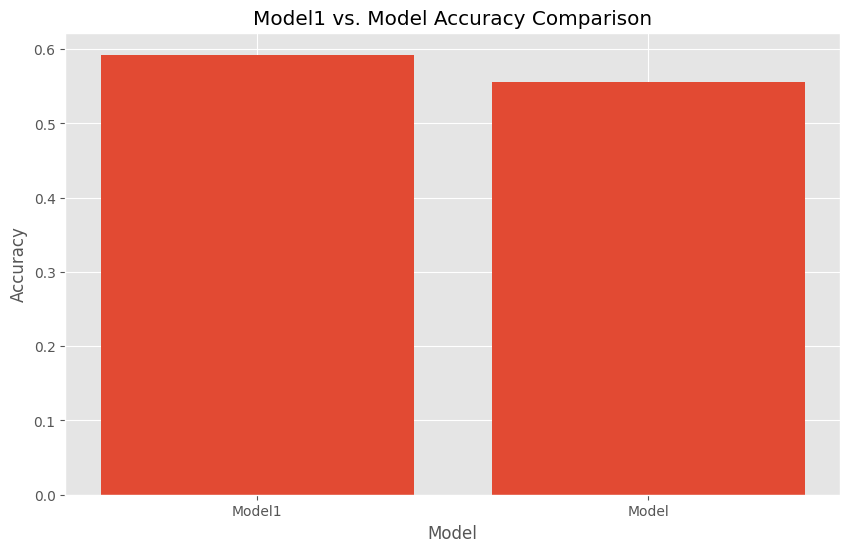

In [31]:
model1_loss, model1_acc = model1.evaluate(X_test, y_test)
print("Model1 Loss:", model1_loss)
print("Model1 Accuracy:", model1_acc)

# Evaluate model
model_loss, model_acc = model.evaluate(X_test, y_test)
print("Model Loss:", model_loss)
print("Model Accuracy:", model_acc)

# Plot comparison graph
plt.figure(figsize=(10, 6))
plt.bar(['Model1', 'Model'], [model1_acc, model_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model1 vs. Model Accuracy Comparison')
plt.show()

In [34]:
model1.predict(X_test)[0]

1/1 [==============================] - 0s 68ms/step


array([-2.0211716 , -2.3973758 , -0.33025414, -0.8119341 ], dtype=float32)